In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
S3JE = pd.read_csv('./magazine/final/S3JE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
S3JE['ADFN_2'] = S3JE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
S3JE['ADFN_2']

0      [빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU...
1      [YSL, 모노그램, 새기, 블랙, 에나멜, 안경, 다리, 둥글, 금테, 안경, L...
2      [블랙, 보디, YSL, 골드, 잠금장치, 스몰, 사이즈, 솔, 페리, LAUREN...
3      [분석가, 적인, 성격, INTJ, 호기심, 책, 좋아하, 성향, 가지, 사이즈, ...
4      [셔츠, LAURENT, ANTHONY, LAURENT, ANTHONY, 슈트, 업...
                             ...                        
771    [서로, 팬임, 인증, 스타, 세레나, 고메즈, 함께한, 컬래버레이션, 곡, 아이스...
772    [내셔널, 아이스크림, 데이, 기념, 귀엽다, 포스팅, 제니, 멤버, 아이스크림, ...
773    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, 컴백, 티징, 비주...
774    [솔로, 곡, 발매, 오는, 정규, 앨범, 컴백, 예정, 멤버, 솔로, 곡, 순차,...
775    [K, 그룹, 최초, 뚜두뚜두, DDU, DU, DDU, DU, 뮤직비디오, 뷰를,...
Name: ADFN_2, Length: 776, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./S3JE_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,제니,9276
1,귀엽다,2241
2,예쁘다,1817
3,사랑,844
4,LAURENT,799
...,...,...
495,프로,34
496,짜,34
497,공부,34
498,d,34


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['제니', '귀엽다', '예쁘다', '사랑', 'LAURENT', '얼굴', '패션', '노래', '무대', '매력', '옷', '아이돌', '스타일', '최고', '젠득', '팬', '여자', '브랜드', 'CHANEL', '실력', '느낌', '영어', '컬러', '앞머리', '컬렉션', '예능', '랩', '모습', '춤', '모델']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['제니', '귀엽다', '예쁘다', '사랑', 'LAURENT', '얼굴', '패션', '노래', '무대', '매력', '옷', '아이돌', '스타일', '최고', '젠득', '팬', '여자', '브랜드', 'CHANEL', '실력', '느낌', '영어', '컬러', '앞머리', '컬렉션', '예능', '랩', '모습', '춤', '모델', '블랙', '분위기', '목소리', '표정', '멤버', '고급', '팬츠', '공주', '발음', '연예인', '사랑스럽다', '쇼', '세상', '라이브', '디자이너', '치마', '의상', '한국', '룩', '재킷']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['제니', '귀엽다', '예쁘다', '사랑', 'LAURENT', '얼굴', '패션', '노래', '무대', '매력', '옷', '아이돌', '스타일', '최고', '젠득', '팬', '여자', '브랜드', 'CHANEL', '실력', '느낌', '영어', '컬러', '앞머리', '컬렉션', '예능', '랩', '모습', '춤', '모델', '블랙', '분위기', '목소리', '표정', '멤버', '고급', '팬츠', '공주', '발음', '연예인', '사랑스럽다', '쇼', '세상', '라이브', '디자이너', '치마', '의상', '한국', '룩', '재킷', '그룹', '입덕', '드레스', '여성', '포인트', 'ANTHONY', '인간', '좋다', '썸네일', '스타일링', '애기', 'HEDI', '연출', '레전드', '레드', '마음', '좋겠다', '스타', '아이템', '디자인', '쿠마', '시즌', '외모', '가수', '장식', '솔로', '매치', '소재', '소화', '메이크업', '남자', '멋있다', '하우스', '라인', '시크', '파리', '완성', '이미지', '탑', '코디', '웃기', '선택', '인기', '마지막', '고양이', '화이트', '많은', '선글라스', '어깨', '몸매']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['제니', '귀엽다', '예쁘다', '사랑', 'LAURENT', '얼굴', '패션', '노래', '무대', '매력', '옷', '아이돌', '스타일', '최고', '젠득', '팬', '여자', '브랜드', 'CHANEL', '실력', '느낌', '영어', '컬러', '앞머리', '컬렉션', '예능', '랩', '모습', '춤', '모델', '블랙', '분위기', '목소리', '표정', '멤버', '고급', '팬츠', '공주', '발음', '연예인', '사랑스럽다', '쇼', '세상', '라이브', '디자이너', '치마', '의상', '한국', '룩', '재킷', '그룹', '입덕', '드레스', '여성', '포인트', 'ANTHONY', '인간', '좋다', '썸네일', '스타일링', '애기', 'HEDI', '연출', '레전드', '레드', '마음', '좋겠다', '스타', '아이템', '디자인', '쿠마', '시즌', '외모', '가수', '장식', '솔로', '매치', '소재', '소화', '메이크업', '남자', '멋있다', '하우스', '라인', '시크', '파리', '완성', '이미지', '탑', '코디', '웃기', '선택', '인기', '마지막', '고양이', '화이트', '많은', '선글라스', '어깨', '몸매', '영화', '데님', '톱', '살', '활동', '세계', '미쳤다', '블링크', '데뷔', '티', '몸', '곱창', '타팬', '성격', '밴드', '볼', '컴백', '심장', '백', '공개', '관심', '음악', '좋', '손', '입술', '하이틴', '슈트', '걸그룹', '셔츠', '화보', '미국', '소리', '좋아요', '착용', '핑크', '집', '찰떡', '카리스마', '키', '와이지', '좋아데', '진', '빛', '바지', '하루', '강아지', '미친', '미모', '기분', '한국인', '미니', '곡', '애교', '명', 'yg', '양갈래', '부츠', '여름', '디렉터'

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['제니', '귀엽다', '예쁘다', '사랑', 'LAURENT', '얼굴', '패션', '노래', '무대', '매력', '옷', '아이돌', '스타일', '최고', '젠득', '팬', '여자', '브랜드', 'CHANEL', '실력', '느낌', '영어', '컬러', '앞머리', '컬렉션', '예능', '랩', '모습', '춤', '모델', '블랙', '분위기', '목소리', '표정', '멤버', '고급', '팬츠', '공주', '발음', '연예인', '사랑스럽다', '쇼', '세상', '라이브', '디자이너', '치마', '의상', '한국', '룩', '재킷', '그룹', '입덕', '드레스', '여성', '포인트', 'ANTHONY', '인간', '좋다', '썸네일', '스타일링', '애기', 'HEDI', '연출', '레전드', '레드', '마음', '좋겠다', '스타', '아이템', '디자인', '쿠마', '시즌', '외모', '가수', '장식', '솔로', '매치', '소재', '소화', '메이크업', '남자', '멋있다', '하우스', '라인', '시크', '파리', '완성', '이미지', '탑', '코디', '웃기', '선택', '인기', '마지막', '고양이', '화이트', '많은', '선글라스', '어깨', '몸매', '영화', '데님', '톱', '살', '활동', '세계', '미쳤다', '블링크', '데뷔', '티', '몸', '곱창', '타팬', '성격', '밴드', '볼', '컴백', '심장', '백', '공개', '관심', '음악', '좋', '손', '입술', '하이틴', '슈트', '걸그룹', '셔츠', '화보', '미국', '소리', '좋아요', '착용', '핑크', '집', '찰떡', '카리스마', '키', '와이지', '좋아데', '진', '빛', '바지', '하루', '강아지', '미친', '미모', '기분', '한국인', '미니', '곡', '애교', '명', 'yg', '양갈래', '부츠', '여름', '디렉터'

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['제니', '귀엽다', '예쁘다', '사랑', 'LAURENT', '얼굴', '패션', '노래', '무대', '매력', '옷', '아이돌', '스타일', '최고', '젠득', '팬', '여자', '브랜드', 'CHANEL', '실력', '느낌', '영어', '컬러', '앞머리', '컬렉션', '예능', '랩', '모습', '춤', '모델', '블랙', '분위기', '목소리', '표정', '멤버', '고급', '팬츠', '공주', '발음', '연예인', '사랑스럽다', '쇼', '세상', '라이브', '디자이너', '치마', '의상', '한국', '룩', '재킷', '그룹', '입덕', '드레스', '여성', '포인트', 'ANTHONY', '인간', '좋다', '썸네일', '스타일링', '애기', 'HEDI', '연출', '레전드', '레드', '마음', '좋겠다', '스타', '아이템', '디자인', '쿠마', '시즌', '외모', '가수', '장식', '솔로', '매치', '소재', '소화', '메이크업', '남자', '멋있다', '하우스', '라인', '시크', '파리', '완성', '이미지', '탑', '코디', '웃기']


### top50만 남기기

In [14]:
len(S3JE)

776

In [15]:
top30_word = []
for i in range(len(S3JE)):
    w=[]
    for word in S3JE.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(S3JE)):
    w=[]
    for word in S3JE.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(S3JE)):
    w=[]
    for word in S3JE.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(S3JE)):
    w=[]
    for word in S3JE.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(S3JE)):
    w=[]
    for word in S3JE.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(S3JE)):
    w=[]
    for word in S3JE.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
S3JE

,magazine,brand,title,word,ADFN,ADFN_2
0,A,YSL,"깊게 뿌리내리기 위하여, 수영","['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '...","[빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU..."
1,A,YSL,안경 하세요?!,"[' YSL 모노그램을 새긴 블랙 에나멜 안경다리의 둥근 금테 안경은 40만원대,...","['YSL', '모노그램', '새기', '블랙', '에나멜', '안경', '다리',...","[YSL, 모노그램, 새기, 블랙, 에나멜, 안경, 다리, 둥글, 금테, 안경, L..."
2,A,YSL,백 하나 살까 고민했다면? 영원한 아이코닉 백 6가지,[' 블랙 보디에 YSL 골드 잠금장치를 더한 스몰 사이즈 솔페리노 사첼백은 4백...,"['블랙', '보디', 'YSL', '골드', '잠금장치', '스몰', '사이즈',...","[블랙, 보디, YSL, 골드, 잠금장치, 스몰, 사이즈, 솔, 페리, LAUREN..."
3,A,YSL,ESFP에게 어울리는 운동화는? MBTI 성향 별 어울리는 백과 슈즈 추천 리스트 [1],['분석가적인 성격의 INTJ. 호기심이 많고 책을 좋아하는 이 같은 성향을 가진 ...,"['분석가', '적인', '성격', 'INTJ', '호기심', '책', '좋아하',...","[분석가, 적인, 성격, INTJ, 호기심, 책, 좋아하, 성향, 가지, 사이즈, ..."
4,A,YSL,골든의 황금시간,[' 셔츠는 생로랑 바이 안토니 바카렐로(Saint Laurent by Antho...,"['셔츠', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHO...","[셔츠, LAURENT, ANTHONY, LAURENT, ANTHONY, 슈트, 업..."
...,...,...,...,...,...,...
771,W,Je,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 스타, 세레나, 고메즈, 함께한, 컬래버레이션, 곡, 아이스..."
772,W,Je,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, 귀엽다, 포스팅, 제니, 멤버, 아이스크림, ..."
773,W,Je,블랙핑크 컴백! 남다른 패션 스타일링,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","[한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, 컴백, 티징, 비주..."
774,W,Je,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다","BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['BLACKPINK', '로제', '리사', '지수', '솔로', '곡', '발매...","[솔로, 곡, 발매, 오는, 정규, 앨범, 컴백, 예정, 멤버, 솔로, 곡, 순차,..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
top50_word

[['LAURENT', 'LAURENT'],
 ['블랙', 'LAURENT', 'LAURENT'],
 ['블랙', 'LAURENT', 'LAURENT', 'LAURENT', '고급', '브랜드', '컬러'],
 ['LAURENT', 'LAURENT'],
 ['LAURENT', 'LAURENT', '스타일'],
 ['LAURENT', 'LAURENT'],
 ['최고', '사랑', '스타일', 'LAURENT', 'LAURENT', 'LAURENT'],
 ['쇼', '스타일', 'LAURENT', '컬렉션', '블랙', '재킷', '쇼', 'LAURENT', 'LAURENT'],
 ['브랜드', 'LAURENT'],
 ['재킷', '팬츠', 'LAURENT', 'LAURENT'],
 ['쇼', 'LAURENT', 'LAURENT'],
 ['재킷', '컬러', '컬러', '느낌', '재킷', '컬러', '재킷', '의상', 'LAURENT', '분위기'],
 ['컬러', 'LAURENT', 'LAURENT', '컬러', 'LAURENT'],
 ['LAURENT', 'LAURENT'],
 ['브랜드',
  '브랜드',
  '옷',
  '브랜드',
  '옷',
  '옷',
  '컬렉션',
  '브랜드',
  'LAURENT',
  '브랜드',
  '디자이너',
  '디자이너',
  '브랜드',
  'LAURENT',
  '브랜드',
  '브랜드'],
 ['패션',
  '패션',
  '브랜드',
  '패션',
  '팬츠',
  'LAURENT',
  '스타일',
  'LAURENT',
  '디자이너',
  'LAURENT',
  '패션',
  'LAURENT',
  'LAURENT',
  'LAURENT'],
 ['패션', 'LAURENT', '재킷', '패션', '재킷', '컬러', '사랑'],
 ['재킷', 'LAURENT', 'LAURENT', '팬츠', '재킷', '팬츠', 'LAURENT', '재킷', '블랙', '스타일'],
 ['브랜드', '컬러', '블랙'

In [28]:
len(top50_word)

776

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['LAURENT', 'LAURENT']

In [46]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.1))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
38,"(LAURENT, 패션)",0.158505,"[((), (LAURENT, 패션), 0.15850515463917525, 1.0)...",2
44,"(제니, 스타일)",0.143041,"[((), (제니, 스타일), 0.14304123711340205, 1.0), ((...",2
45,"(패션, 제니)",0.136598,"[((), (패션, 제니), 0.13659793814432988, 1.0), ((제...",2
37,"(LAURENT, 컬렉션)",0.131443,"[((), (LAURENT, 컬렉션), 0.13144329896907217, 1.0...",2
36,"(브랜드, LAURENT)",0.122423,"[((), (브랜드, LAURENT), 0.12242268041237113, 1.0...",2
40,"(매력, 제니)",0.119845,"[((), (매력, 제니), 0.11984536082474227, 1.0), ((매...",2
35,"(제니, CHANEL)",0.113402,"[((), (제니, CHANEL), 0.1134020618556701, 1.0), ...",2
39,"(룩, 제니)",0.108247,"[((), (룩, 제니), 0.10824742268041238, 1.0), ((룩)...",2
34,"(LAURENT, ANTHONY)",0.103093,"[((), (LAURENT, ANTHONY), 0.10309278350515463,...",2
43,"(사랑, 제니)",0.101804,"[((), (사랑, 제니), 0.1018041237113402, 1.0), ((사랑...",2


In [47]:
for item in df['items']:
    if '제니' in item:
        print(item)

frozenset({'제니', '스타일'})
frozenset({'패션', '제니'})
frozenset({'매력', '제니'})
frozenset({'제니', 'CHANEL'})
frozenset({'룩', '제니'})
frozenset({'사랑', '제니'})
frozenset({'포인트', '제니'})
frozenset({'매치', '제니'})


In [48]:
df[df['items'] == {'제니'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [49]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [50]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [51]:
pos = nx.spring_layout(G)

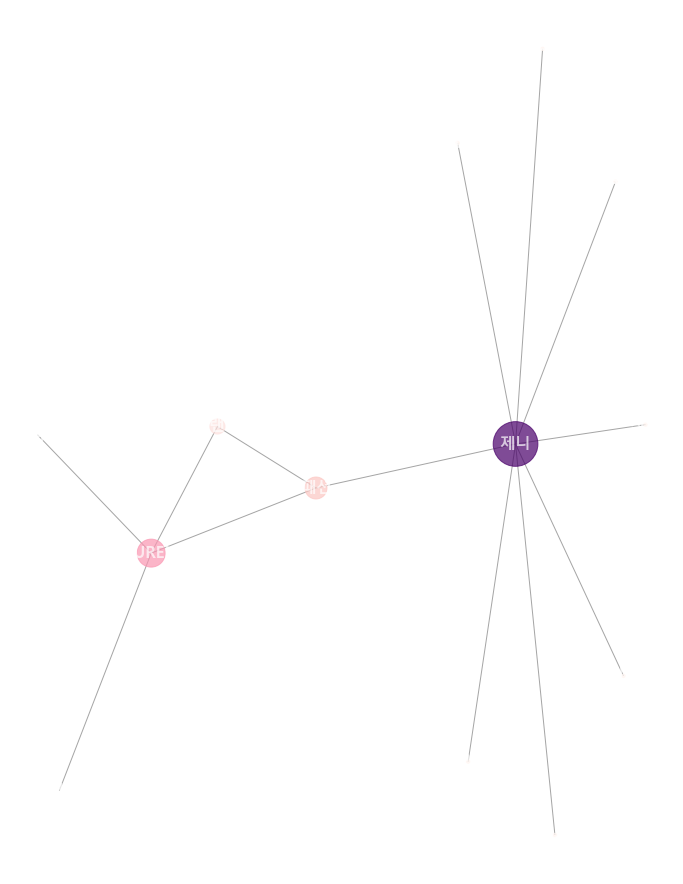

In [52]:
plt.figure(figsize = (12, 16)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_S3JE_top500_mis1.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [53]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']